<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/13_1_7_THEORY_Image_compression_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression using PCA


In [ ]:
from time import time

from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 12]


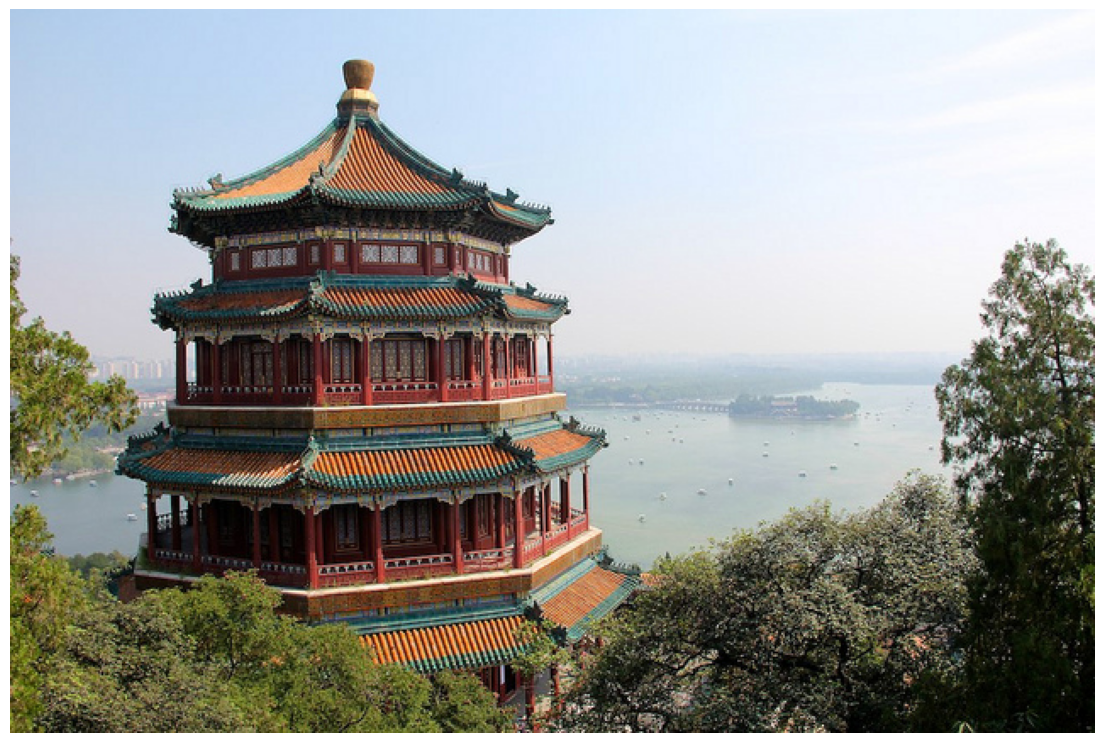

In [ ]:
# Load the Summer Palace photo
plt.axis("off")
china = load_sample_image("china.jpg")
plt.imshow(china)


In [ ]:
h, w, ch = china.shape
h, w, ch

(427, 640, 3)

In [ ]:
red = china[..., 0]
green = china[..., 1]
blue = china[..., 2]

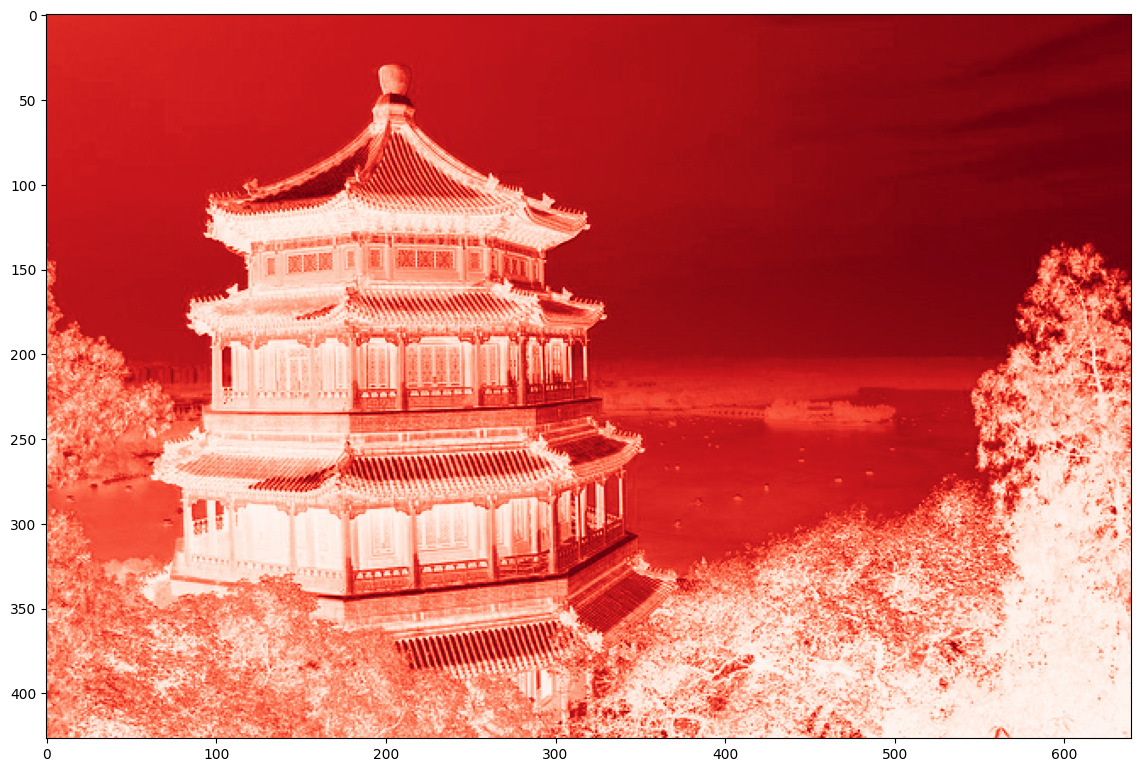

In [ ]:
plt.imshow(red, cmap="Reds")

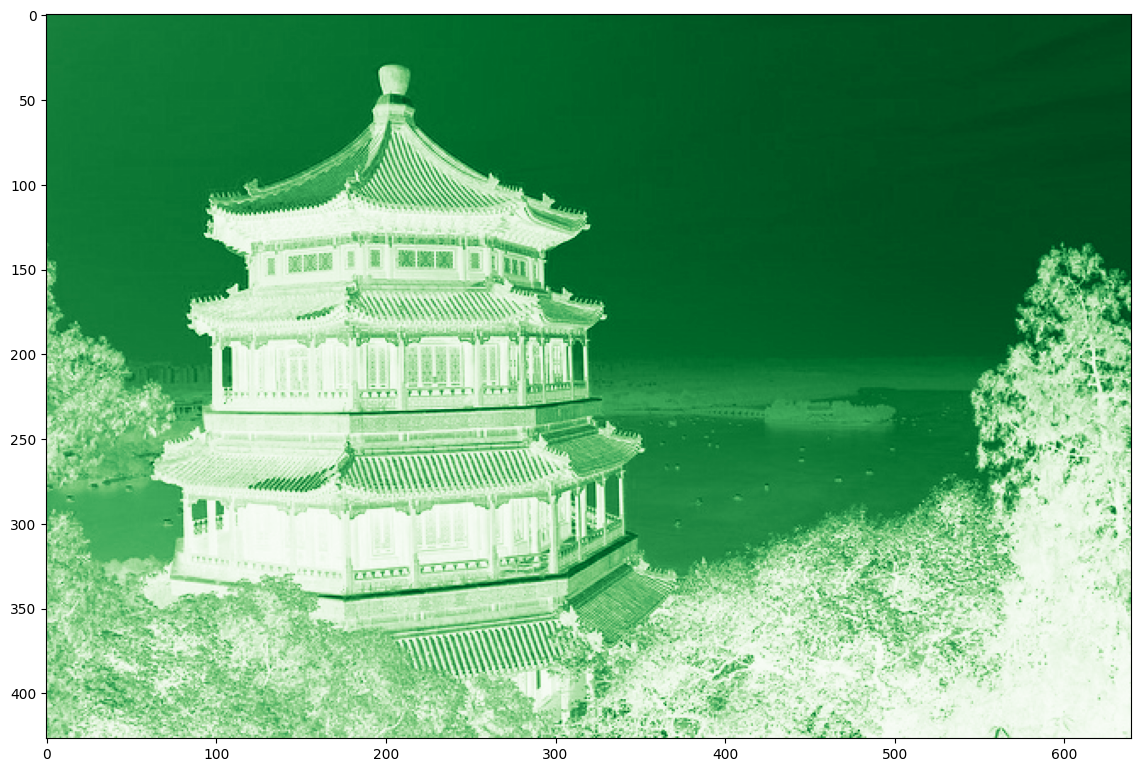

In [ ]:
plt.imshow(green, cmap="Greens")

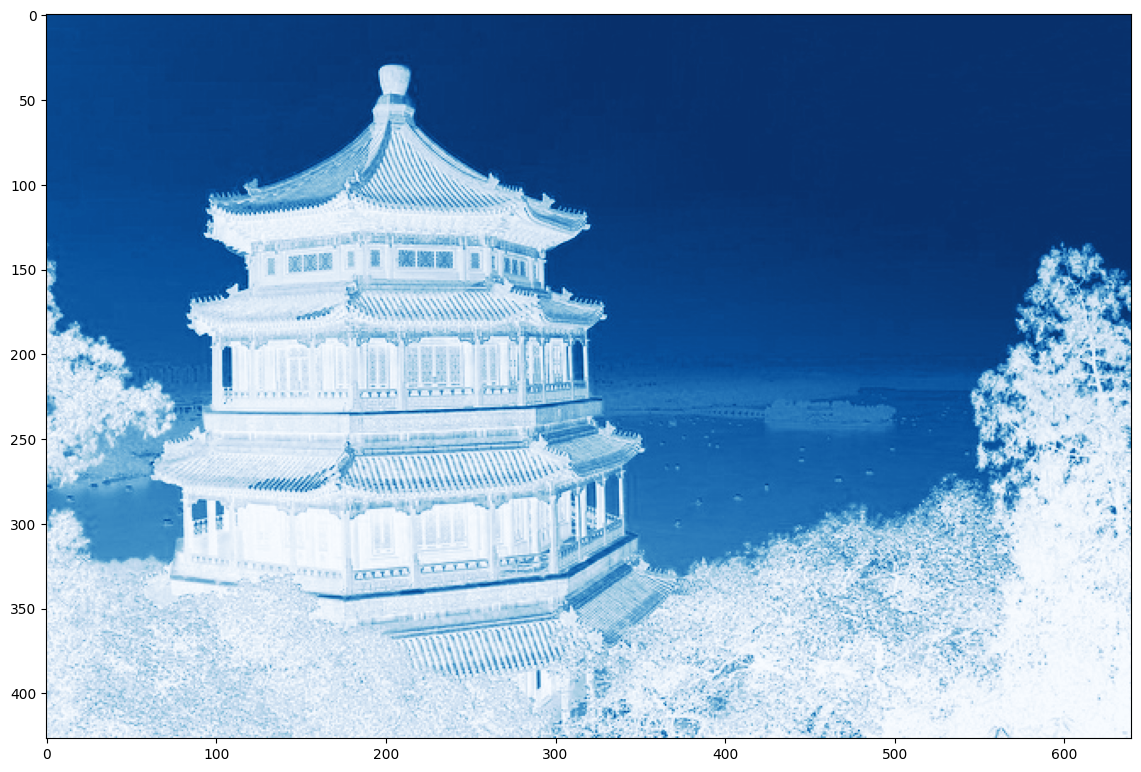

In [ ]:
plt.imshow(blue, cmap="Blues")

**Imagine the following scenario:** We want to send one image over the internet from a server to an user.

We will use a PCA model to compress image matrix size and the try to restore it later on the user side.

- Server side:
  1. Compress with PCA
  2. Send image, original size was (427, 640), compressed -> (427, 50)

- User Side:
  1. De-compress with PCA, received image size is (427, 50), after restoring process -> (427, 640)


---
## We must scale our data first

In [ ]:
# Scale to 0 - 1 range
# Remember pixels values are between 0 - 255
red = red / 255.
green = green / 255.
blue = blue / 255.

---
## Now we can use PCA on each channel

In [ ]:
n_components = 100

In [ ]:
# pca.transform() -> Encoding: (427, 640) -> (427, 50)
pca_r = PCA(n_components=n_components)
pca_r.fit(red)
trans_pca_r = pca_r.transform(red)

pca_b = PCA(n_components=n_components)
pca_b.fit(blue)
trans_pca_b = pca_b.transform(blue)

pca_g = PCA(n_components=n_components)
pca_g.fit(green)
trans_pca_g = pca_g.transform(green)


In [ ]:
print(trans_pca_r.shape)
print(trans_pca_b.shape)
print(trans_pca_g.shape)

(427, 100)
(427, 100)
(427, 100)


In [ ]:
print(f"Red Channel: {sum(pca_r.explained_variance_ratio_)}")
print(f"Blue Channel: {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")

Red Channel: 0.9696282469558976
Blue Channel: 0.9809017430122566
Green Channel: 0.9732147380456316


---
## Reconstruct image

In [ ]:
# pca.inverse_transform() -> Decoding : (427, 50) -> (427, 640)
r_arr = pca_r.inverse_transform(trans_pca_r)
g_arr = pca_g.inverse_transform(trans_pca_g)
b_arr = pca_b.inverse_transform(trans_pca_b)

print(r_arr.shape, g_arr.shape, b_arr.shape)

reconstructed_img = np.dstack((r_arr, g_arr, b_arr))
print(reconstructed_img.shape)

(427, 640) (427, 640) (427, 640)
(427, 640, 3)


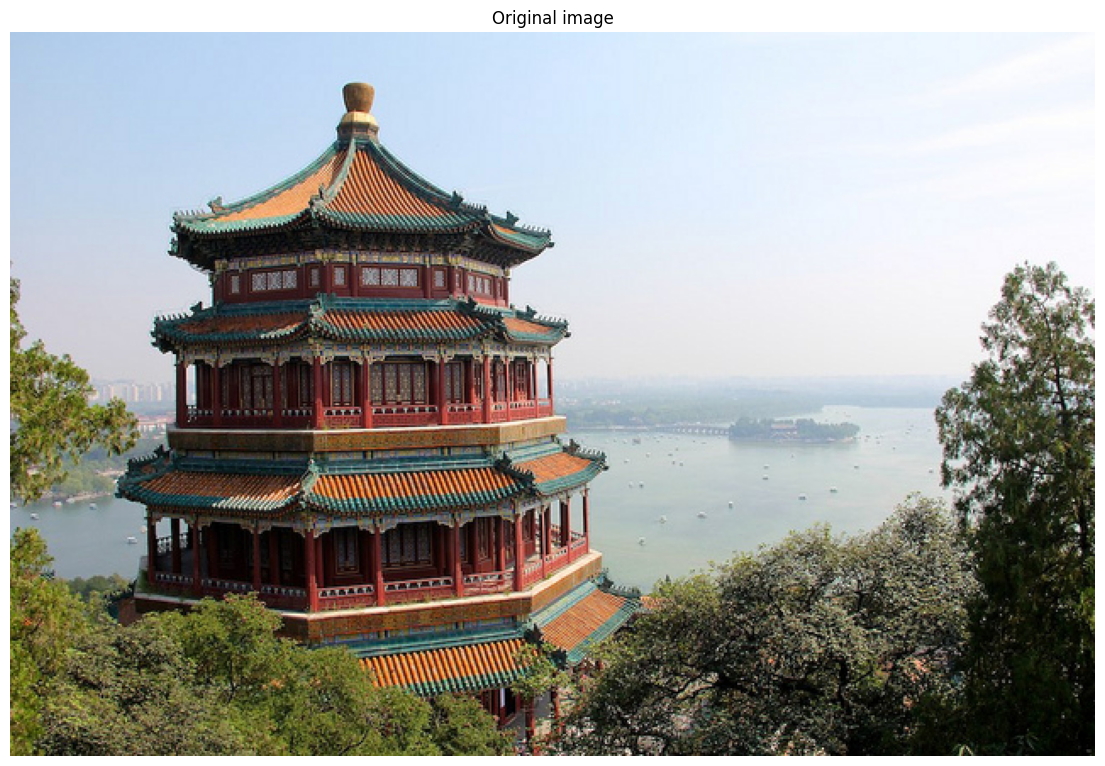

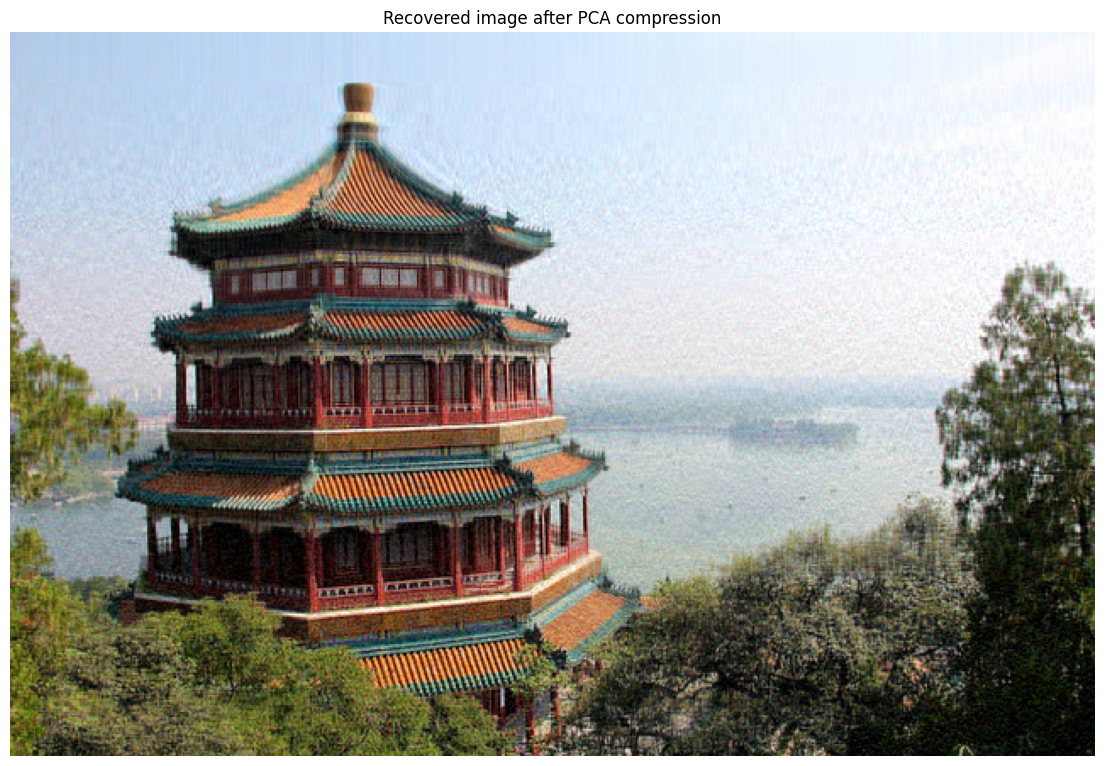

In [ ]:
# Display all results, alongside original image
plt.figure()
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(china)

plt.figure()
plt.clf()
plt.axis("off")
plt.title(f"Recovered image after PCA compression")
plt.imshow(reconstructed_img)

---
## Reference:

- [A quick guide to color image compression using PCA in python](https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118)